In [1]:
# store start time to get execution time of entire script
import time
start_time = time.time()

In [2]:
# helper functions for displaying table data

import numpy as np
from IPython.display import display_html

# n is the number of columns to display data in
def display_side_by_side(series_obj, n):
    df = pd.DataFrame(series_obj)
    partition = int(round(len(df) / n))
    lower_bound = 0
    upper_bound = partition
    args = []
    for i in range(n):
        args.append(df[lower_bound:upper_bound])
        lower_bound += partition
        upper_bound += partition
    helper(args)

def helper(args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [3]:
INCLUDE_MURDER = True

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import csv

if INCLUDE_MURDER:
    fname = 'data_cleaned_Illicit_Days0_grouped_with_murder.csv'
else:
    fname = 'data_cleaned_Illicit_Days0_grouped.csv'

df = pd.read_csv(fname)
df.head()

,Unnamed: 0,female,nonwhite,unemplmt,prsatx,adol,Illicit_Days0,Illicit_Cens0,checkin_flag,gvsg_-8,gvsg_-4,gvsg_0,gvsg_1,gvsg_2,CWSg_0_-8,CWSg_0_-4,CWSg_0_0,CWSg_0_1,CWSg_0_2,srprobg_0.0,srprobg_1.0,srprobg_2.0,dssg_0_-8,dssg_0_-4,dssg_0_0,dssg_0_1,dssg_0_2,epsg_0_-8,epsg_0_-4,epsg_0_0,epsg_0_1,epsg_0_2,adhdg_0_-8,adhdg_0_-4,adhdg_0_0,adhdg_0_1,adhdg_0_2,cdsg_0_-8,cdsg_0_-4,cdsg_0_0,cdsg_0_1,cdsg_0_2,cjsig_0_-8,cjsig_0_-7,cjsig_0_-4,cjsig_0_0,cjsig_0_1,cjsig_0_2,lrig_0_-8,lrig_0_-7,lrig_0_-4,lrig_0_0,lrig_0_1,lrig_0_2,srig_0_-8,srig_0_-7,srig_0_-4,srig_0_0,srig_0_1,srig_0_2,pssig_0_-8,pssig_0_-7,pssig_0_-4,pssig_0_-3,pssig_0_0,pssig_0_1,pssig_0_2,rerig_0_-8,rerig_0_-7,rerig_0_-4,rerig_0_-3,rerig_0_0,rerig_0_1,rerig_0_2,racegrps_-8,racegrps_-4,racegrps_1,racegrps_2,racegrps_3,racegrps_4,racegrps_5,racegrps_6,racegrps_7,POPIgrp_-8,POPIgrp_-7,POPIgrp_-4,POPIgrp_-3,POPIgrp_1,POPIgrp_2,POPIgrp_3,POPIgrp_4,POPIgrp_5,afssg_0_-8,afssg_0_-4,afssg_0_0,afssg_0_1,afssg_0_2,tpsg_0_-8,tpsg_0_-4,tpsg_0_-3,tpsg_0_0,tpsg_0_1,tpsg_0_2,gssig_0_-8,gssig_0_-4,gssig_0_-3,gssig_0_0,gssig_0_1,gssig_0_2,PMSg_-8,PMSg_-7,PMSg_-4,PMSg_-3,PMSg_0,PMSg_1,PMSg_2,IMSg_-8,IMSg_-7,IMSg_-4,IMSg_-3,IMSg_0,IMSg_1,IMSg_2,SESg_0_-8,SESg_0_-7,SESg_0_-4,SESg_0_0,SESg_0_1,SESg_0_2,r4ag_0_0.0,r4ag_0_1.0,r4ag_0_2.0,primsev_1.0,primsev_3.0,primsev_4.0,primsev_5.0,primsev_6.0,murder_num_grouped_0.0,murder_num_grouped_1.0,murder_num_grouped_2.0
0,2387,1,1.0,1.0,1.0,0,96,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0
1,4287,1,1.0,1.0,0.0,0,240,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,5217,1,1.0,0.0,0.0,0,365,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,5781,1,1.0,1.0,0.0,0,351,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0
4,5980,1,1.0,1.0,1.0,0,365,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [5]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(14850, 139)

In [6]:
from sklearn.model_selection import train_test_split
from sksurv.util import Surv

predictor_var = 'Illicit_Days0'
censoring_var = 'Illicit_Cens0'

# divide dataset into those who checked in for illicit drugs and those tho didn't
illicit_cases = df[df.checkin_flag == 0]
nonillicit_cases = df[df.checkin_flag == 1]

print("Illicit:",illicit_cases.shape)
print("Non-Illicit:",nonillicit_cases.shape)

Illicit: (3927, 139)
Non-Illicit: (10923, 139)


Illicit Case, Adolescent Survival Analysis

In [7]:
illicit_adol_data = illicit_cases[illicit_cases.adol == 1]
illicit_adol_label = illicit_adol_data[[censoring_var, predictor_var]]
illicit_adol_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(illicit_adol_data, illicit_adol_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(2160, 137) (2160,)
(540, 137) (540,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
%%time
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

//anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: sklearn.tree._splitter.Splitter size changed, may indicate binary incompatibility. Expected 360 from C header, got 368 from PyObject
  return f(*args, **kwds)


CPU times: user 10.4 s, sys: 107 ms, total: 10.5 s
Wall time: 14.3 s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [9]:
%%time
from sksurv.ensemble import RandomSurvivalForest

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 1.55 s, sys: 71.9 ms, total: 1.62 s
Wall time: 2.63 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [10]:
%%time
from sksurv.linear_model import CoxnetSurvivalAnalysis

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 969 ms, sys: 19.5 ms, total: 988 ms
Wall time: 1.97 s


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [11]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Illicit_Adol': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
illicit_adol_concordance = pd.DataFrame(data=scores)
illicit_adol_concordance

,Model,Illicit_Adol
0,Random Forest Boosted,0.679870
1,Random Forest,0.683218
2,Lasso,0.675885


In [12]:
# display feature importance from gbsa
illicit_adol_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Illicit_Adol':gbsa.feature_importances_,})
illicit_adol_feature_importance.sort_values(by=['Illicit_Adol'], ascending=False, inplace=True)
temp = illicit_adol_feature_importance[illicit_adol_feature_importance.Illicit_Adol > 0.01]
display_side_by_side(temp, 4)

,Feature,Illicit_Adol
16,srprobg_0.0,0.378979
75,racegrps_3,0.067428
128,r4ag_0_2.0,0.058562
132,primsev_5.0,0.056615
,Feature,Illicit_Adol
26,epsg_0_0,0.054526
133,primsev_6.0,0.041529
135,murder_num_grouped_1.0,0.038678
38,cdsg_0_2,0.026313
,Feature,Illicit_Adol


In [13]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

In [14]:
import matplotlib.pyplot as plt

def get_ground_truth(data):
    relapsed = data[data.Illicit_Cens0 == 0]
    counts = relapsed['Illicit_Days0'].value_counts()
    counts = counts.to_dict()
    temp = [len(data)] * 365
    labels = list(range(365))
    for i in range(365):
        labels[i] += 1
    total = 0
    errors = []
    for i in range(365):
        try:
            temp[i] = temp[i] - counts[i+1] - total
            total = total + counts[i+1]
        except KeyError:
            errors.append(i)

    for ele in sorted(errors, reverse = False):
        if ele != 0:
            temp[ele] = temp[ele-1]
        else:
             temp[0] = len(data)
    temp = [x / len(data) for x in temp]
    return labels, temp

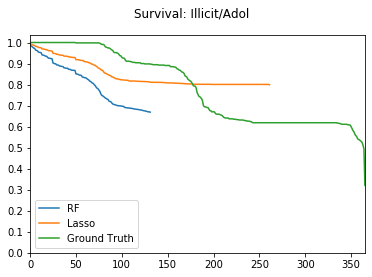

In [15]:
# display survival plot
plt.suptitle('Survival: Illicit/Adol')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels1, temp1 = get_ground_truth(y_test)
plt.plot(labels1, temp1, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_illicit_adol_grouped_with_murder.png'
else:
    fname = 'survival_illicit_adol_grouped.png'
plt.savefig(fname)
plt.show()

In [16]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

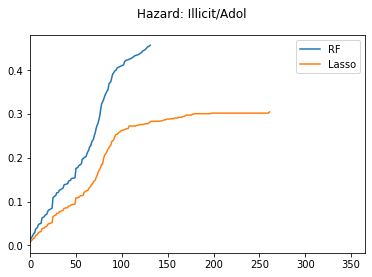

In [17]:
# display hazard plot
plt.suptitle('Hazard: Illicit/Adol')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Illicit Case, Young Adult Survival Analysis

In [18]:
illicit_young_adult_features = illicit_cases[illicit_cases.adol == 0]
illicit_young_adult_labels = illicit_young_adult_features[[censoring_var, predictor_var]]
illicit_young_adult_features.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(illicit_young_adult_features, illicit_young_adult_labels, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(981, 137) (981,)
(246, 137) (246,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 2.31 s, sys: 6.02 ms, total: 2.31 s
Wall time: 2.45 s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [20]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 712 ms, sys: 32.3 ms, total: 744 ms
Wall time: 799 ms


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [21]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 466 ms, sys: 5.61 ms, total: 472 ms
Wall time: 513 ms


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [22]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'Illicit_Young_Adult': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
illicit_young_adult_concordance = pd.DataFrame(data=scores)
illicit_young_adult_concordance

,Model,Illicit_Young_Adult
0,Random Forest Boosted,0.669748
1,Random Forest,0.704364
2,Lasso,0.638907


In [23]:
# display feature importance for gbsa
illicit_young_adult_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'Illicit_Young_Adult':gbsa.feature_importances_,})
illicit_young_adult_feature_importance.sort_values(by=['Illicit_Young_Adult'], ascending=False, inplace=True)
temp = illicit_young_adult_feature_importance[illicit_young_adult_feature_importance.Illicit_Young_Adult > 0.01]
display_side_by_side(temp, 4)

,Feature,Illicit_Young_Adult
132,primsev_5.0,0.152813
87,POPIgrp_4,0.060989
64,rerig_0_-8,0.053431
77,racegrps_5,0.049091
123,SESg_0_0,0.041926
62,pssig_0_1,0.038957
96,tpsg_0_-3,0.036757
,Feature,Illicit_Young_Adult
61,pssig_0_0,0.033086
76,racegrps_4,0.031510


In [24]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

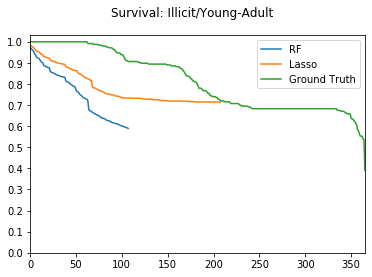

In [25]:
# display survival plot
plt.suptitle('Survival: Illicit/Young-Adult')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels2, temp2 = get_ground_truth(y_test)
plt.plot(labels2, temp2, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_illicit_young_adult_grouped_with_murder.png'
else:
    fname = 'survival_illicit_young_adult_grouped.png'
plt.savefig(fname)
plt.show()

In [26]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

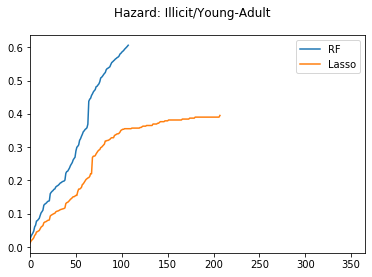

In [27]:
# display hazard plot
plt.suptitle('Hazard: Illicit/Young-Adult')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Non-Illicit Case, Adolescent Survival Analysis

In [28]:
nonillicit_adol_data = nonillicit_cases[nonillicit_cases.adol == 1]
nonillicit_adol_label = nonillicit_adol_data[[censoring_var, predictor_var]]
nonillicit_adol_data.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(nonillicit_adol_data, nonillicit_adol_label, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(7392, 137) (7392,)
(1849, 137) (1849,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 1min 41s, sys: 278 ms, total: 1min 41s
Wall time: 1min 49s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [30]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 4.72 s, sys: 376 ms, total: 5.1 s
Wall time: 5.79 s


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [31]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 2.83 s, sys: 149 ms, total: 2.98 s
Wall time: 2.32 s


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [32]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
          'NonIllicit_Adol': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                           rcr.score(X_test, y_test_censored)]}
nonillicit_adol_concordance = pd.DataFrame(data=scores)
nonillicit_adol_concordance

,Model,NonIllicit_Adol
0,Random Forest Boosted,0.661048
1,Random Forest,0.685375
2,Lasso,0.661979


In [33]:
# display feature importance for gbsa

nonillicit_adol_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'NonIllicit_Adol':gbsa.feature_importances_,})
nonillicit_adol_feature_importance.sort_values(by=['NonIllicit_Adol'], ascending=False, inplace=True)
temp = nonillicit_adol_feature_importance[nonillicit_adol_feature_importance.NonIllicit_Adol > 0.01]
display_side_by_side(temp, 4)

,Feature,NonIllicit_Adol
75,racegrps_3,0.332422
18,srprobg_2.0,0.115710
126,r4ag_0_0.0,0.097014
16,srprobg_0.0,0.055667
,Feature,NonIllicit_Adol
42,cjsig_0_0,0.050413
36,cdsg_0_0,0.041624
26,epsg_0_0,0.038023
135,murder_num_grouped_1.0,0.036966
,Feature,NonIllicit_Adol


In [34]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

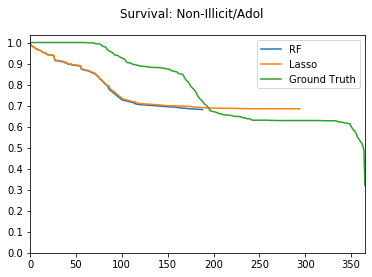

In [35]:
# display survival plot
plt.suptitle('Survival: Non-Illicit/Adol')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels3, temp3 = get_ground_truth(y_test)
plt.plot(labels3, temp3, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_nonillicit_adol_grouped_with_murder.png'
else:
    fname = 'survival_nonillicit_adol_grouped.png'
plt.savefig(fname)
plt.show()

In [36]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

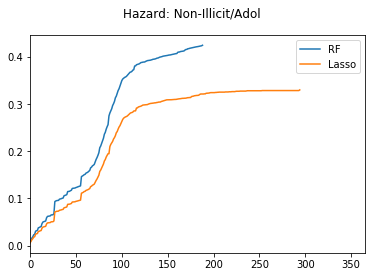

In [37]:
# display hazard plot
plt.suptitle('Hazard: Non-Illicit/Adol')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Non-Illicit Case, Young Adult Survival Analysis

In [38]:
nonillicit_young_adult_features = nonillicit_cases[nonillicit_cases.adol == 0]
nonillicit_young_adult_labels = nonillicit_young_adult_features[[censoring_var, predictor_var]]
nonillicit_young_adult_features.drop(columns=[censoring_var, predictor_var], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(nonillicit_young_adult_features, nonillicit_young_adult_labels, test_size=0.2)
y_train_censored = Surv.from_arrays(y_train[censoring_var].copy(), y_train[predictor_var].copy()) # structured array to ensure censoring of 365 value
y_test_censored = Surv.from_arrays(y_test[censoring_var].copy(), y_test[predictor_var].copy()) # structured array to ensure censoring of 365 value
print(X_train.shape, y_train_censored.shape)
print(X_test.shape, y_test_censored.shape)

(1345, 137) (1345,)
(337, 137) (337,)


//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
%%time

gbsa = GradientBoostingSurvivalAnalysis()
gbsa.fit(X_train, y_train_censored)

CPU times: user 3.11 s, sys: 23.9 ms, total: 3.13 s
Wall time: 3.77 s


GradientBoostingSurvivalAnalysis(criterion='friedman_mse', dropout_rate=0.0,
                                 learning_rate=0.1, loss='coxph', max_depth=3,
                                 max_features=None, max_leaf_nodes=None,
                                 min_impurity_decrease=0.0,
                                 min_impurity_split=None, min_samples_leaf=1,
                                 min_samples_split=2,
                                 min_weight_fraction_leaf=0.0, n_estimators=100,
                                 presort='auto', random_state=None,
                                 subsample=1.0, verbose=0)

In [40]:
%%time

rsf = RandomSurvivalForest()
rsf.fit(X_train, y_train_censored)

CPU times: user 668 ms, sys: 41.9 ms, total: 710 ms
Wall time: 719 ms


RandomSurvivalForest(bootstrap=True, max_depth=None, max_features='auto',
                     max_leaf_nodes=None, min_samples_leaf=3,
                     min_samples_split=6, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [41]:
%%time

# l1_ratio = 1 adjusts model to implement LASSO method for penalties
# fit_baseline_model = True allows us to create survival/hazard plots after model is fit

rcr = CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1)
rcr.fit(X_train, y_train_censored)

CPU times: user 721 ms, sys: 53.3 ms, total: 774 ms
Wall time: 459 ms


CoxnetSurvivalAnalysis(alpha_min_ratio=0.0001, alphas=None, copy_X=True,
                       fit_baseline_model=True, l1_ratio=1, max_iter=100000,
                       n_alphas=100, normalize=False, penalty_factor=None,
                       tol=1e-07, verbose=False)

In [42]:
scores = {'Model': ['Random Forest Boosted', 'Random Forest', 'Lasso'], 
               'NonIllicit_Young_Adult': [gbsa.score(X_test, y_test_censored), rsf.score(X_test, y_test_censored), 
                        rcr.score(X_test, y_test_censored)]}
nonillicit_young_adult_concordance = pd.DataFrame(data=scores)
nonillicit_young_adult_concordance

,Model,NonIllicit_Young_Adult
0,Random Forest Boosted,0.647398
1,Random Forest,0.644889
2,Lasso,0.628852


In [43]:
# display feature importance for gbsa

nonillicit_young_adult_feature_importance = pd.DataFrame({'Feature':X_train.columns, 'NonIllicit_Young_Adult':gbsa.feature_importances_,})
nonillicit_young_adult_feature_importance.sort_values(by=['NonIllicit_Young_Adult'], ascending=False, inplace=True)
temp = nonillicit_young_adult_feature_importance[nonillicit_young_adult_feature_importance.NonIllicit_Young_Adult > 0.01]
display_side_by_side(temp, 4)

,Feature,NonIllicit_Young_Adult
76,racegrps_4,0.078385
67,rerig_0_-3,0.076995
51,srig_0_-8,0.053208
125,SESg_0_2,0.050770
77,racegrps_5,0.045714
1,nonwhite,0.043261
33,adhdg_0_2,0.035478
75,racegrps_3,0.035392
,Feature,NonIllicit_Young_Adult
95,tpsg_0_-4,0.030676


In [44]:
pred_surv_rsf = rsf.predict_survival_function(X_test)
pred_surv_rcr = rcr.predict_survival_function(X_test)

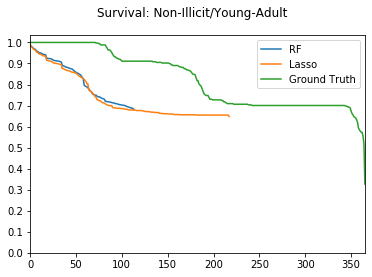

In [45]:
# display survival plot
plt.suptitle('Survival: Non-Illicit/Young-Adult')
plt.plot(np.mean([person for person in pred_surv_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_surv_rcr], axis=0), label='Lasso')
labels4, temp4 = get_ground_truth(y_test)
plt.plot(labels4, temp4, label='Ground Truth')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_nonillicit_young_adult_grouped_with_murder.png'
else:
    fname = 'survival_nonillicit_young_adult_grouped.png'
plt.savefig(fname)
plt.show()

In [46]:
pred_haz_rsf = rsf.predict_cumulative_hazard_function(X_test)
pred_haz_rcr = rcr.predict_cumulative_hazard_function(X_test)

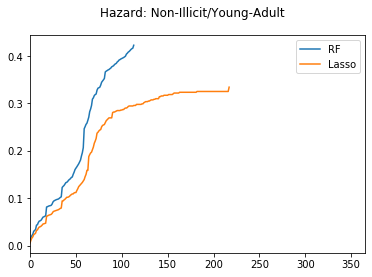

In [47]:
# display hazard plot
plt.suptitle('Hazard: Non-Illicit/Young-Adult')
plt.plot(np.mean([person for person in pred_haz_rsf], axis=0), label='RF')
plt.plot(np.mean([person.y for person in pred_haz_rcr], axis=0), label='Lasso')
plt.legend()
plt.xlim(0, 365)
plt.show()

Overall Statistics

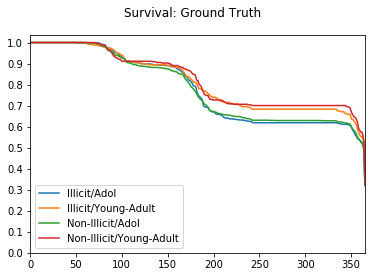

In [48]:
# ground truth curves for all 4 subsets
plt.suptitle('Survival: Ground Truth')
plt.plot(labels1, temp1, label='Illicit/Adol')
plt.plot(labels2, temp2, label='Illicit/Young-Adult')
plt.plot(labels3, temp3, label='Non-Illicit/Adol')
plt.plot(labels4, temp4, label='Non-Illicit/Young-Adult')
plt.legend()
plt.xlim(0, 365)
plt.xticks(np.arange(0, 365, step=50))
plt.yticks(np.arange(0, 1.1, step=0.1))
if INCLUDE_MURDER:
    fname = 'survival_age_and_checkin_GROUND_TRUTHS_grouped_with_murder.png'
else:
    fname = 'survival_age_and_checkin_GROUND_TRUTHS_grouped.png'
plt.savefig(fname)
plt.show()

In [49]:
overall_scores = pd.concat([illicit_adol_concordance, illicit_young_adult_concordance['Illicit_Young_Adult'], nonillicit_adol_concordance['NonIllicit_Adol'], nonillicit_young_adult_concordance['NonIllicit_Young_Adult']], axis=1)
pd.DataFrame(data=overall_scores)

,Model,Illicit_Adol,Illicit_Young_Adult,NonIllicit_Adol,NonIllicit_Young_Adult
0,Random Forest Boosted,0.679870,0.669748,0.661048,0.647398
1,Random Forest,0.683218,0.704364,0.685375,0.644889
2,Lasso,0.675885,0.638907,0.661979,0.628852


In [50]:
temp = pd.concat([illicit_adol_feature_importance, illicit_young_adult_feature_importance['Illicit_Young_Adult'], nonillicit_adol_feature_importance['NonIllicit_Adol'], nonillicit_young_adult_feature_importance['NonIllicit_Young_Adult']], axis=1)
overall_feature_importance = pd.DataFrame(data=temp)

In [51]:
# trim features to top 10 based on highest impact overall (sum of individual model importances)

overall_feature_importance['Total'] = overall_feature_importance[['Illicit_Adol','Illicit_Young_Adult','NonIllicit_Adol',
                                         'NonIllicit_Young_Adult']].sum(axis=1)
temp = overall_feature_importance.nlargest(10,['Total'])
display_side_by_side(temp, 1)

,Feature,Illicit_Adol,Illicit_Young_Adult,NonIllicit_Adol,NonIllicit_Young_Adult,Total
16,srprobg_0.0,0.378979,0.007834,0.055667,0.000111,0.442591
75,racegrps_3,0.067428,0.002087,0.332422,0.035392,0.437329
132,primsev_5.0,0.056615,0.152813,0.000000,0.000000,0.209429
18,srprobg_2.0,0.025649,0.013867,0.115710,0.005105,0.160331
135,murder_num_grouped_1.0,0.038678,0.030448,0.036966,0.026834,0.132926
126,r4ag_0_0.0,0.001740,0.026536,0.097014,0.001892,0.127182
76,racegrps_4,0.000000,0.031510,0.009681,0.078385,0.119576
67,rerig_0_-3,0.000095,0.021637,0.019463,0.076995,0.118190
77,racegrps_5,0.006142,0.049091,0.000000,0.045714,0.100947
26,epsg_0_0,0.054526,0.001459,0.038023,0.000000,0.094008


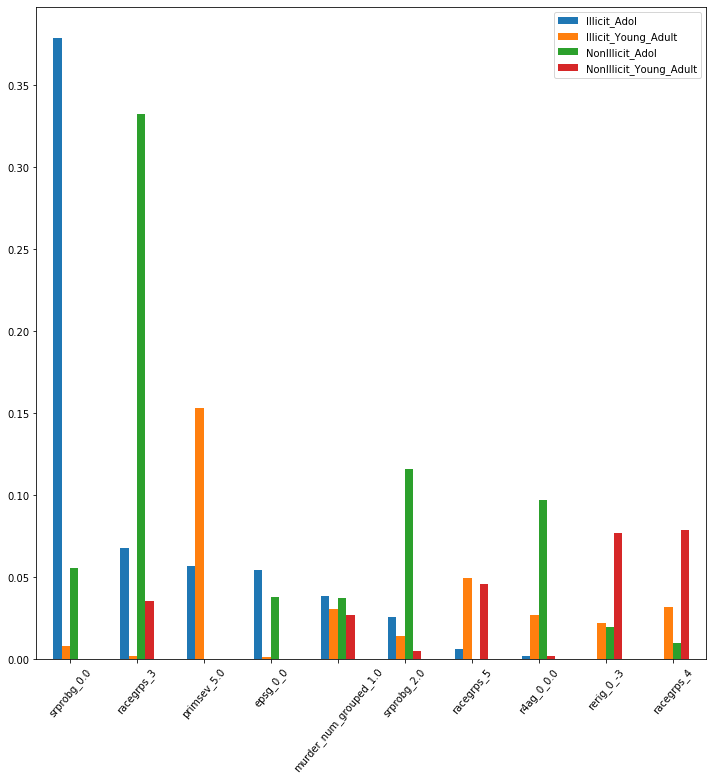

In [52]:
df = pd.DataFrame({'Illicit_Adol': temp['Illicit_Adol'].tolist(),
                   'Illicit_Young_Adult': temp['Illicit_Young_Adult'].tolist(),
                   'NonIllicit_Adol': temp['NonIllicit_Adol'].tolist(),
                   'NonIllicit_Young_Adult': temp['NonIllicit_Young_Adult'].tolist()},
                  index=temp['Feature'].tolist())
df.sort_values(by=['Illicit_Adol'], ascending=False, inplace=True)
ax = df.plot.bar(rot=50, figsize=(12, 12))
fig = ax.get_figure()
if INCLUDE_MURDER:
    fname = 'feature_importances_age_and_checkin_grouped_with_murder.png'
else:
    fname = 'feature_importances_age_and_checkin_grouped.png'
fig.savefig(fname)

In [53]:
# print out total notebook execution time
total_seconds = int(time.time() - start_time)
minutes = total_seconds // 60
seconds = total_seconds % 60
print("--- " + str(minutes) + " minutes " + str(seconds) + " seconds ---")

--- 2 minutes 35 seconds ---
